In [43]:
import pandas as pd
import numpy as np
import statsmodels.stats.multicomp as multi 
import statsmodels.formula.api as smf


In [152]:
add_health = pd.read_csv("add_health.csv", low_memory=False)

# Handling variables for check: alcohol consumption and skipped days at school
Bare in mind, that originally it's a string variable, because of "Skip" answer, which is marked as " "

In [153]:
add_health['SCHSKIP'] = pd.to_numeric(add_health['H1ED2'].replace(["996","997", "998", " "], np.NaN))

In [155]:
add_health['ALCTIMESYEAR'] = pd.to_numeric(add_health['H1TO15'].replace([96,97,98], np.NaN))
add_health['H1TO16'] = pd.to_numeric(add_health['H1TO16'].replace([96,97, 98, 99], np.NaN))
add_health.loc[add_health['H1TO15'] == 1, 'ALCTIMESYEAR'] = 365 #every day
add_health.loc[add_health['H1TO15'] == 2, 'ALCTIMESYEAR'] = 4*52 #3-5 times per week
add_health.loc[add_health['H1TO15'] == 3, 'ALCTIMESYEAR'] = 1.5*52 #2-3 times per week
add_health.loc[add_health['H1TO15'] == 4, 'ALCTIMESYEAR'] = 2.5*12 #2-3 times per month
add_health.loc[add_health['H1TO15'] == 5, 'ALCTIMESYEAR'] = 10
add_health.loc[add_health['H1TO15'] == 6, 'ALCTIMESYEAR'] = 1.5
add_health.loc[add_health['H1TO15'] == 7, 'ALCTIMESYEAR'] = 0.1
add_health['ALCCONS'] = add_health['ALCTIMESYEAR']*add_health['H1TO16']

In [156]:
add_health['SIGCTIMESYEAR'] = pd.to_numeric(add_health['H1TO5'].replace([96,97,98], np.NaN))
add_health['H1TO7'] = pd.to_numeric(add_health['H1TO7'].replace([96,97, 98, 99], np.NaN))
add_health = add_health.drop(add_health[add_health['SIGCTIMESYEAR'] == np.NaN].index)
add_health = add_health.drop(add_health[add_health['H1TO7'] == np.NaN].index)

add_health = add_health.drop(add_health[add_health['SIGCTIMESYEAR'] == np.NaN].index)
add_health = add_health.drop(add_health[add_health['H1TO16'] == np.NaN].index)
add_health['SIGCCONS'] = add_health['SIGCTIMESYEAR']*add_health['H1TO7']


In [160]:
add_health['MARJUSAGE'] = pd.to_numeric(add_health['H1TO31'].replace(["996","997", "998", "999"], np.NaN))
add_health = add_health.drop(add_health[add_health['MARJUSAGE'] == np.NaN].index)


In [161]:
add_health['COCUSAGE'] = pd.to_numeric(add_health['H1TO36'].replace(["996","997", "998", "999"], np.NaN))
add_health['GLUEUSAGE'] = pd.to_numeric(add_health['H1TO38'].replace(["996","997", "998", "999", " "], np.NaN))
add_health['FIGHTS'] = pd.to_numeric(add_health['H1FV13'].replace(["996","997", "998", "999", " "], np.NaN))


In [163]:
add_health['WORKH'] = pd.to_numeric(add_health['H1EE4'].replace(["996","997", "998", "999"], np.NaN))
add_health = add_health.drop(add_health[add_health['WORKH'] == np.NaN].index)

add_health['WORKP'] = pd.to_numeric(add_health['H1EE5'].replace(["996","997", "998", "999"], np.NaN))
add_health = add_health.drop(add_health[add_health['WORKP'] == np.NaN].index)

add_health['WORKHS'] = pd.to_numeric(add_health['H1EE6'].replace(["996","997", "998", "999", " "], np.NaN))
add_health = add_health.drop(add_health[add_health['WORKHS'] == np.NaN].index)

add_health['WORKPS'] = pd.to_numeric(add_health['H1EE7'].replace(["996","997", "998", "999", " "], np.NaN))
add_health = add_health.drop(add_health[add_health['WORKPS'] == np.NaN].index)

add_health = add_health.drop(add_health[np.isnan(add_health['WORKP'])].index)
add_health = add_health.drop(add_health[np.isnan(add_health['WORKH'])].index)
add_health = add_health.drop(add_health[np.isnan(add_health['WORKPS'])].index)
add_health = add_health.drop(add_health[np.isnan(add_health['WORKHS'])].index)


In [164]:
add_health = add_health.drop(add_health[np.isnan(add_health['ALCCONS'])].index)
add_health = add_health.drop(add_health[np.isnan(add_health['SIGCCONS'])].index)
add_health = add_health.drop(add_health[np.isnan(add_health['SCHSKIP'])].index)


In [165]:
add_health = add_health.drop(add_health[np.isnan(add_health['COCUSAGE'])].index)
add_health = add_health.drop(add_health[np.isnan(add_health['GLUEUSAGE'])].index)
add_health = add_health.drop(add_health[np.isnan(add_health['FIGHTS'])].index)


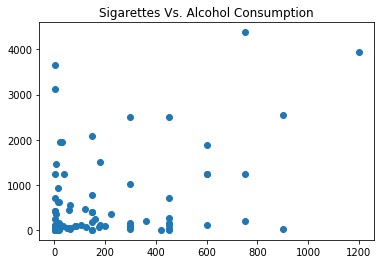

In [166]:
import matplotlib.pyplot as plt

plt.scatter(add_health['SIGCCONS'], add_health['ALCCONS'])
plt.title('Cigarettes Vs. Alcohol Consumption')
plt.show()

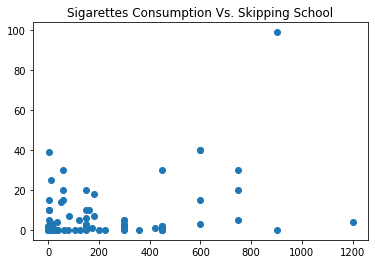

In [167]:
plt.scatter(add_health['SIGCCONS'], add_health['SCHSKIP'])
plt.title('Cigarettes Consumption Vs. Skipping School')
plt.show()

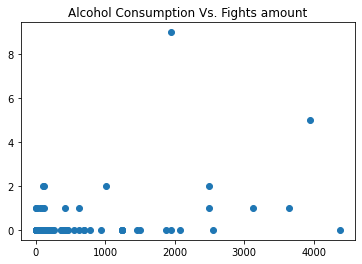

In [168]:
plt.scatter(add_health['ALCCONS'], add_health['FIGHTS'])
plt.title('Alcohol Consumption Vs. Fights amount')
plt.show()

In [ ]:
add_health = add_health.drop(add_health[np.isnan(add_health['GLUEUSAGE'])].index)
add_health = add_health.drop(add_health[np.isnan(add_health['FIGHTS'])].index)

print(np.isnan(add_health['SCHSKIP']).any())
print(np.isnan(add_health['SIGCCONS']).any())
print(np.isnan(add_health['MARJUSAGE']).any())

print(np.isinf(add_health['SCHSKIP']).any())
print(np.isinf(add_health['SIGCCONS']).any())
print(np.isinf(add_health['MARJUSAGE']).any())

# Statistical check
### Null-hypothesis is: there's no correlation between smoking sigarettes and alcohol consumption among adolescents
Both of the variables are quantitative, so in order to check hypothesis, Pearson correlation coefficient will be used

In [144]:
import scipy

print("Correlation between sigarettes consumption and skipping school lessons is:")
print (scipy.stats.pearsonr(add_health['SIGCCONS'], add_health['SCHSKIP'])[0])
print('p-value is: \n' + str(scipy.stats.pearsonr(add_health['SIGCCONS'], add_health['SCHSKIP'])[1]))

print("Correlation between sigarettes consumption and alcohol consumption is:")
print (scipy.stats.pearsonr(add_health['SIGCCONS'], add_health['ALCCONS'])[0])
print('p-value is: \n' + str(scipy.stats.pearsonr(add_health['SIGCCONS'], add_health['ALCCONS'])[1]))

print('\n*p-value reflects probability of getting this correlation if variables are not correlated')



Correlation between sigarettes consumption and skipping school lessons is:
0.3543497702137602
p-value is: 
0.0010900817614459056
Correlation between sigarettes consumption and alcohol consumption is:
0.3537450028249284
p-value is: 
0.0011132700405329728

*p-value reflects probability of getting this correlation if variables are not correlated


In [151]:
print (scipy.stats.pearsonr(add_health['MARJUSAGE'], add_health['ALCCONS']))
print (scipy.stats.pearsonr(add_health['ALCCONS'], add_health['SCHSKIP']))

print()

print (scipy.stats.pearsonr(add_health['ALCCONS'], add_health['FIGHTS']))
print (scipy.stats.pearsonr(add_health['MARJUSAGE'], add_health['FIGHTS']))
print (scipy.stats.pearsonr(add_health['SIGCCONS'], add_health['FIGHTS']))
print (scipy.stats.pearsonr(add_health['WORKH'], add_health['FIGHTS']))
print (scipy.stats.pearsonr(add_health['COCUSAGE'], add_health['FIGHTS']))

print()


print (scipy.stats.pearsonr(add_health['WORKP'], add_health['WORKH']))
print (scipy.stats.pearsonr(add_health['WORKPS'], add_health['WORKHS']))
print (scipy.stats.pearsonr(add_health['WORKH'], add_health['WORKHS']))


(-0.1460267952462805, 0.1905146854832537)
(0.009124580868256696, 0.9351558239642218)

(0.35604478172756515, 0.0010274069825153525)
(-0.16646232525599103, 0.13499558820516266)
(0.12281218703587973, 0.27167828127911914)
(0.07170931326315444, 0.5220350616999564)
(-0.05794876768069548, 0.605067223820226)

(-0.5246127854542386, 4.211973847566371e-07)
(0.7780379878742884, 8.00637729122521e-18)
(0.34483352550050084, 0.0015109423985715947)
